# Chapter 1: Machine Learning with Python

## Linear & Non-linear Regressions

### Simple and multiple linear Regressions

Linear regression is a form of fitting continuous variables on each other. The main idea is that certain factors, or a combination of them, are related to additional factors through a given relation. These factors can be summarized and put into a function, defining the relation between the independent as well as dependent variables within a given sample. The easiest form of relation is a linear relation. If this condition is satisfied, we use an approach called "fitting", which defines that we fit the combination of dependent and independent variables for each observation and produces a linear slope. The slope is defined according to the principle that the sum of squared residuals (SSR) is minimised. The SSR is the average difference between each actual and predicted value of our dependent variable. 

Within a linear regression, on or a range of factors influence the variable of interest in a linear way. This indicates that the slope of the regression curve will be the same for each value combination within the slope. Although in statistical analysis many assumptions must be made regarding the validity of the model in terms of endogeneity concerns, prediction and predictive models in machine learning are less stringent to such requirements. 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova

In [6]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data

In [7]:
cars = pd.DataFrame(mtcars)

Let's start by describing and analysing our data:

In [8]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [9]:
cars_rel = cars[["mpg", "qsec","hp", "carb"]]

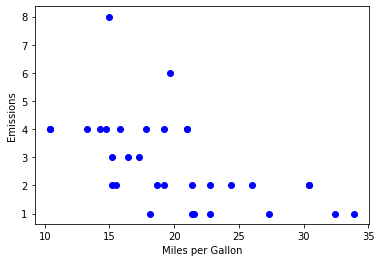

In [10]:
plt.scatter(cars_rel.mpg, cars_rel.carb, color = "blue")
plt.xlabel("Miles per Gallon")
plt.ylabel("Emissions")
plt.show()

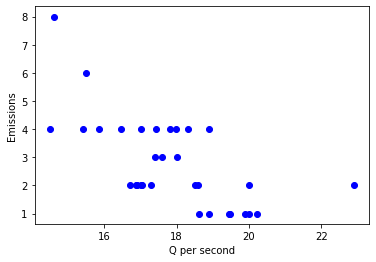

In [11]:
plt.scatter(cars_rel.qsec, cars_rel.carb, color = "blue")
plt.xlabel("Q per second")
plt.ylabel("Emissions")
plt.show()

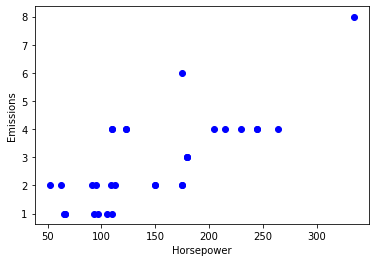

In [12]:
plt.scatter(cars_rel.hp, cars_rel.carb, color = "blue")
plt.xlabel("Horsepower")
plt.ylabel("Emissions")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

What does that mean, exactly? Well, that you simply take the training set, regress the relation with this set, retrieve a function and use this function in the testing set. Then, you compare the actual values of the testing set with its predicted values based on the function of the training set and retrieve a residual.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [13]:
msk = np.random.rand(len(cars_rel)) < 0.8
train = cars_rel[msk]
test = cars_rel[~msk]

Now, we can use the linear regression approach:

In [14]:
from sklearn import linear_model as lm 

lm = lm.LinearRegression()

train_x = np.asanyarray(train[["mpg", "qsec","hp"]])
train_y = np.asanyarray(train[["carb"]])
lm.fit(train_x, train_y)

print("Coefficient:", lm.coef_)
print("Intercept:", lm.intercept_)

Coefficient: [[ 0.04320678 -0.20919231  0.01741065]]
Intercept: [3.14337084]


#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error. Formula: $MAE =\frac{1}{n} * \sum^n_{j=1} |y_j - \hat{y_j} | $ </li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones. Formula: $MSE =\frac{1}{n} * \sum^n_{j=1} (y_j - \hat{y_j})^2 $</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. Formula: $RMSE =\sqrt{\frac{1}{n} * \sum^n_{j=1} (y_j - \hat{y_j})^2} $</li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>



In [15]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["mpg", "qsec","hp"]])
test_y = np.asanyarray(test[["carb"]])
lm.fit(test_x, test_y)
test_y_hat = lm.predict(test_x) # This is the predicted values for the testing section


print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 0.33
Residual sum of squares (MSE): 0.13
R2-score: 0.90


### Non-linear Regressions

#### Polynomial Regressions

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [16]:
from sklearn.preprocessing import PolynomialFeatures as pf 

train_x = np.asanyarray(train[["mpg", "qsec","hp"]])
train_y = np.asanyarray(train[["carb"]])

test_x = np.asanyarray(test[["mpg", "qsec","hp"]])
test_y = np.asanyarray(test[["carb"]])


poly = pf(degree=8)
train_x_poly = poly.fit_transform(train_x)
train_y_ = lm.fit(train_x_poly, train_y)

It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. 
Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  $x$ with $x_1$, $x_1^2$ with $x_2$, and so on. Then the degree 2 equation would be turn into:

$y = b + \theta_1  x_1 + \theta_2 x_2$ for each x

Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems. 



so we can use __LinearRegression()__ function to solve it:

In [17]:
test_x_poly = poly.fit_transform(test_x)
test_y_hat = lm.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y))

Mean absolute error: 328.59
Residual sum of squares (MSE): 251589.08
R2-score: -0.75


#### Logistic Regressions:

For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year. 

In [18]:
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
china = pd.read_csv("china_gdp.csv")

2020-08-19 11:00:42 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


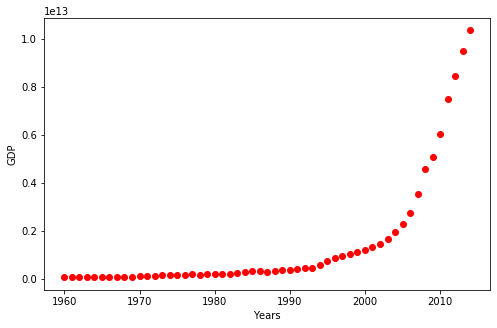

In [19]:
plt.figure(figsize = (8,5))
x_value, y_value = (china["Year"].values, china["Value"].values)
plt.xlabel("Years")
plt.ylabel("GDP")
plt.plot(x_value, y_value, "ro")
plt.show()

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated.

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

In [20]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

Let's look at a sample:

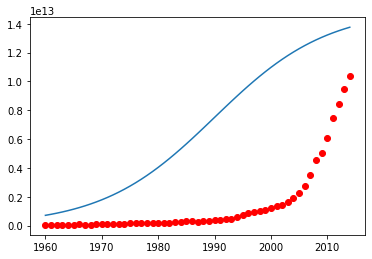

In [21]:
Beta_1 = 0.10
Beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_value, Beta_1 , Beta_2)

#plot initial prediction against datapoints
plt.plot(x_value, Y_pred*15000000000000.)
plt.plot(x_value, y_value, 'ro')

In [22]:
# Lets normalize our data
xdata =x_value/max(x_value)
ydata =y_value/max(y_value)

#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(x_value, *popt) - y_value is minimized.

This means that the function looks for the values of Beta 1 and Beta 2 that deliver the y_hat values which will have the smallest SSR. 

popt are our optimized parameters.

In [23]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453018, beta_2 = 0.997207


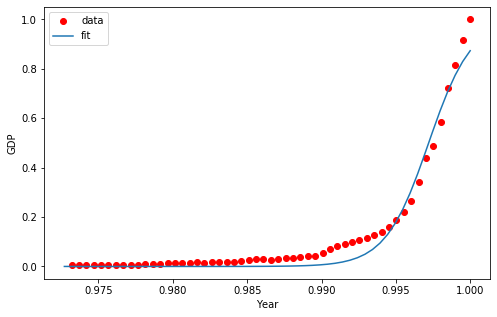

In [24]:
x = np.linspace(1960,2015,55)
x = x/max(x)
plt.figure(figsize = (8,5))
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, "ro", label = "data")
plt.plot(x, y, label = "fit")
plt.legend(loc = "best")
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


## Classification

Classification is a form of supervised learning. It basically classifies individuals into a certain group depending on their pre-determined characteristics. Classification can be used for both binary and multilineary analysis to assign individuals a certain status. 

The most common tools for classification are:

1. k-nearest neighbors
2. Decision Trees
3. Logistic Regression
4. Support Vector Machines (SVM)
5. Neural Networks
6. Naive Bayes
7. Linear Discrimination Analysis (LDA)

### K-nearest neighbors

The K-Nearest Neighbors algorithm is a classification algorithm that takes a bunch of labeled points and uses them to learn how to label other points. This algorithm classifies cases based on their similarity to other cases. In K-Nearest Neighbors, data points that are near each other are said to be neighbors. K-Nearest Neighbors is based on this paradigm. Similar cases with the same class labels are near each other. Thus, the distance between two cases is a measure of their dissimilarity. There are different ways to calculate the similarity or, conversely, the distance or dissimilarity of two data points. 

In a classification problem, the K-Nearest Neighbors algorithm works as follows:

1. Pick a value for K
2. Calculate the distance from the new case hold out from each of the cases in the dataset
3. Search for the K-observations in the training data that are nearest to the measurements of the unknown data point
4. Predict the response of the unknown data point using the most popular response value from the K-Nearest Neighbors

There are two parts in this algorithm that might be a bit confusing: 

1. How to select the correct K
2. How to compute the similarity between cases

To one: The general solution is to reserve a part of your data for testing the accuracy of the model. Once you've done so, choose K equals one and then use the training part for modeling and calculate the accuracy of prediction using all samples in your test set. Repeat this process increasing the K and see which K is best for your model.

To two: We can use the Minowski distance matrix for multidimensional vectors. Of course, we have to normalize our feature set to get the accurate dissimilarity measure.

In [25]:
import itertools
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [26]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-08-19 11:00:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K   139KB/s    in 0.3s    

2020-08-19 11:00:55 (139 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [27]:
telco = pd.read_csv("teleCust1000t.csv")

In [28]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [29]:
x = telco[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values.astype(float)
y = telco['custcat'].values

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [30]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


We can now introduce the KNN method. As we said, the best way to figure out which k to use is by defining the same method for different ks and then deciding through an evaluation technique, which the optimal k is to use that maximizes the accuracy / minimizes the errors. Commonly, we have three types of evaluation strategies: 

1. Jaccard index

Let’s say y shows the true labels of the churn dataset. And $\hat{y}$ shows the predicted values by our classifier. Then we can define Jaccard as the size of the intersection divided by the size of the union of two label sets. 

This is given by the formula: $\frac{|y \cap \hat{y}|}{|y| + |\hat{y}| - |y \cap \hat{y}| }$

For example, for a test set of size 10, with 8 correct predictions, or 8 intersections, the accuracy by the Jaccard index would be: 8 / (10+10-8) = 0.66. 

If the **entire set** of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0, otherwise it is 0.0. 

This means, **The closer the value to 1, the better**

In [35]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

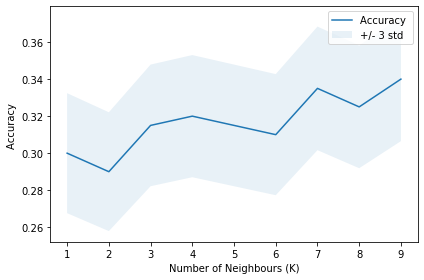

In [38]:
plt.plot(range(1,Ks), mean_acc)
plt.fill_between(range(1,Ks), mean_acc - std_acc*1, mean_acc + std_acc*1, alpha = 0.1)
plt.legend(('Accuracy ', '+/- 3 std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

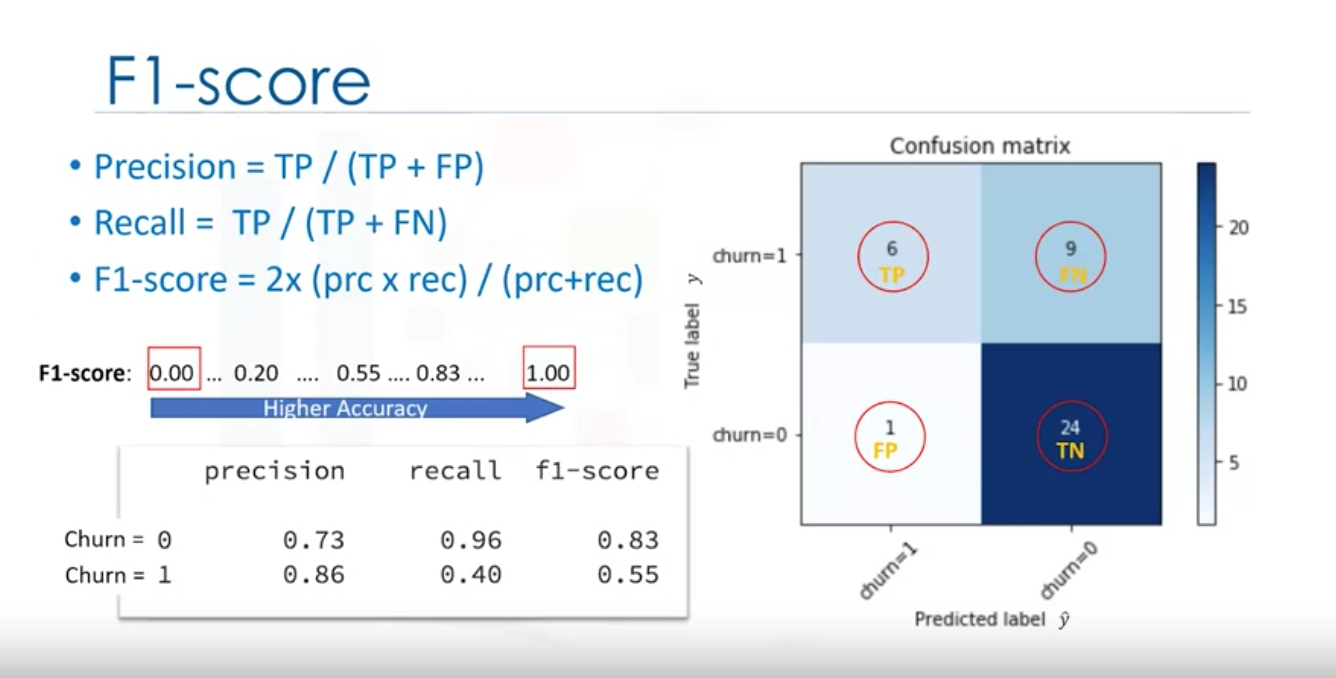

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="/Users/nikolas.anic/Desktop/ML/ML_Python_Certificate/Matrix.png")